In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Bidirectional, LSTM, GRU

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL SK 21 3 23/NLP /Code and Data/review.csv")
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [3]:
negative = " ".join(df[df["sentiment"] == 0]["review"])
positive = " ".join(df[df["sentiment"] == 1]["review"])

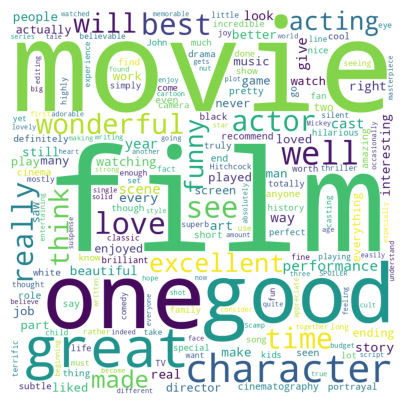

In [4]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(positive)

plt.figure(figsize=(7,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

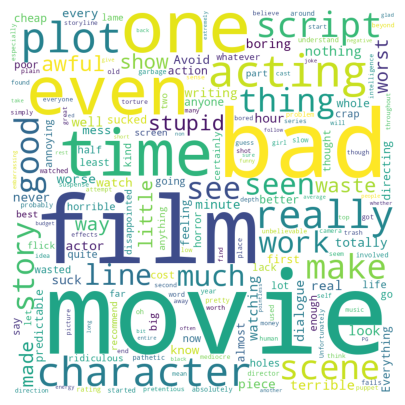

In [5]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(negative)

plt.figure(figsize=(7,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [3]:
# feature and target
# train test split

X = df["review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Tokenization

In [4]:
tok = Tokenizer()
tok.fit_on_texts(X_train)

In [5]:
vocabulary = tok.word_index

print(vocabulary)

vocab_length = len(vocabulary)

print(vocab_length)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'is': 5, 'this': 6, 'it': 7, 'i': 8, 'to': 9, 'in': 10, 'was': 11, 'movie': 12, 'film': 13, 'that': 14, 'for': 15, 'with': 16, 'as': 17, 'but': 18, 'are': 19, 'on': 20, 'not': 21, "it's": 22, 'just': 23, 'one': 24, 'you': 25, 'bad': 26, 'an': 27, 'all': 28, 'so': 29, 'about': 30, 'at': 31, 'very': 32, 'there': 33, 'like': 34, 'good': 35, 'by': 36, 'from': 37, 'have': 38, 'time': 39, 'he': 40, 'out': 41, 'even': 42, 'acting': 43, 'has': 44, 'his': 45, 'be': 46, 'were': 47, 'well': 48, 'if': 49, 'great': 50, 'who': 51, 'characters': 52, 'how': 53, 'more': 54, 'my': 55, 'or': 56, 'really': 57, 'see': 58, 'when': 59, 'some': 60, 'than': 61, 'no': 62, 'best': 63, 'plot': 64, 'made': 65, 'story': 66, 'movies': 67, 'character': 68, "didn't": 69, 'most': 70, 'scenes': 71, 'wonderful': 72, 'its': 73, 'better': 74, "don't": 75, '10': 76, 'me': 77, 'ever': 78, 'they': 79, 'what': 80, 'which': 81, 'also': 82, 'can': 83, 'only': 84, 'real': 85, 'work': 86, 'see

## Tokens to sequence

In [6]:
train_sequences = tok.texts_to_sequences(X_train)
print(train_sequences)

[[7, 912, 60, 913, 529, 16, 914, 2, 530, 2, 4, 531, 44, 915, 532, 102], [6, 5, 3, 377, 12], [18, 7, 5, 378, 916], [1, 533, 31, 917, 47, 918, 2, 66, 5, 29, 132, 7, 919, 534, 379, 30, 81, 535, 920, 3, 921, 922, 1, 923, 9, 244, 380, 381, 8, 23, 69, 297, 30, 107, 4, 6, 13, 2, 382, 21, 9, 245, 924, 213, 3, 925, 536, 9, 926, 537, 927], [1, 12, 44, 188, 62, 246, 71, 10, 7, 2, 32, 115, 214], [1, 928, 71, 19, 133, 929, 189, 34, 383, 930, 134, 247, 931, 932, 31, 384, 14, 19, 76, 933, 934, 4, 1, 935, 385], [936, 77, 3, 538, 18, 8, 91, 6, 5, 24, 4, 1, 63, 67, 78], [8, 116, 21, 937, 9, 42, 117, 7, 15, 32, 215, 15, 539, 4, 938, 8, 939], [22, 29, 26, 22, 147, 135, 216, 23, 15, 14, 540], [6, 12, 5, 82, 541], [6, 12, 5, 29, 386], [542, 940, 11, 387, 388], [22, 136, 543, 14, 6, 72, 13, 11, 65, 10, 941, 17, 544, 298, 108, 73, 942, 943, 10, 1, 944, 945, 217, 2, 299, 529, 31, 14, 39], [10, 248, 8, 148, 7, 74, 61, 946, 16, 3, 947, 2, 8, 148, 6, 948, 949, 950, 74, 61, 951, 389], [8, 300, 952, 1, 162, 39, 8, 

## Padding

In [7]:
doc_length = []

for doc in train_sequences:
  doc_length.append(len(doc))

print(doc_length)


[16, 5, 5, 51, 13, 25, 15, 17, 11, 5, 5, 5, 29, 22, 16, 16, 11, 35, 20, 10, 16, 29, 4, 2, 18, 14, 12, 12, 11, 12, 34, 30, 34, 28, 3, 45, 12, 6, 1, 36, 19, 7, 33, 35, 15, 11, 33, 19, 7, 5, 8, 12, 20, 10, 18, 7, 16, 6, 21, 11, 10, 3, 5, 8, 5, 6, 4, 6, 15, 34, 8, 21, 20, 29, 31, 4, 6, 9, 27, 11, 6, 34, 6, 38, 21, 20, 13, 8, 7, 25, 14, 18, 17, 18, 26, 7, 5, 3, 11, 17, 23, 8, 7, 12, 3, 2, 3, 11, 5, 5, 14, 12, 9, 14, 15, 9, 8, 12, 15, 26, 9, 3, 6, 24, 12, 10, 10, 10, 34, 28, 19, 10, 11, 24, 21, 27, 24, 4, 17, 10, 19, 20, 27, 16, 12, 33, 9, 12, 10, 6, 6, 2, 5, 4, 3, 15, 5, 16, 2, 7, 9, 18, 25, 25, 12, 12, 24, 33, 5, 13, 5, 4, 17, 23, 13, 7, 15, 21, 25, 8, 18, 11, 17, 12, 43, 25, 35, 5, 12, 12, 9, 24, 28, 5, 7, 10, 6, 6, 11, 6, 5, 6, 4, 5, 21, 7, 19, 20, 6, 3, 2, 16, 16, 18, 2, 12, 8, 4, 8, 19, 8, 25, 31, 14, 7, 2, 20, 14, 7, 57, 25, 19, 14, 2, 12, 27, 12, 33, 24, 14, 18, 5, 16, 10, 13, 5, 5, 3, 22, 9, 16, 28, 17, 11, 4, 9, 10, 9, 20, 13, 10, 7, 31, 11, 24, 7, 24, 16, 19, 21, 12, 3, 7, 36, 8, 

In [8]:
print("max length - ", max(doc_length))
print("99% qunatile - ", np.quantile(doc_length,0.99))
print("95% quantile- ", np.quantile(doc_length,0.95))
print("90% quantile- ", np.quantile(doc_length,0.90))

max length -  69
99% qunatile -  45.0
95% quantile-  33.0
90% quantile-  27.0


In [9]:
max_length = 45

In [10]:
train_matrix = sequence.pad_sequences(train_sequences,maxlen=max_length)
print(train_matrix )

[[  0   0   0 ... 915 532 102]
 [  0   0   0 ...   3 377  12]
 [  0   0   0 ...   5 378 916]
 ...
 [  0   0   0 ...   3  85  12]
 [  0   0   0 ...  20   2  20]
 [  0   0   0 ...  22 454 840]]


## Test data

In [11]:
test_sequences = tok.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequences,maxlen=max_length)
print(test_matrix)

[[  0   0   0 ...   3 388 111]
 [  0   0   0 ...   9 101  77]
 [  0   0   0 ...  42  35  15]
 ...
 [  0   0   0 ...   3  35 222]
 [  0   0   0 ...  22  23 551]
 [  0   0   0 ...  12   5 128]]


In [15]:
model = Sequential()
model.add(Embedding(input_dim=vocab_length+1,
                    output_dim=32,
                    input_length=max_length,
                    mask_zero=True))
model.add(SimpleRNN(128))
model.add(Dense(128, activation="tanh"))
model.add(Dense(128, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

model.fit(train_matrix, y_train, epochs=10, batch_size=32)

Epoch 1/10
22/22 [==============================] - 9s 29ms/step - loss: 0.6974
Epoch 2/10
22/22 [==============================] - 1s 28ms/step - loss: 0.5198
Epoch 3/10
22/22 [==============================] - 1s 30ms/step - loss: 0.2009
Epoch 4/10
22/22 [==============================] - 1s 29ms/step - loss: 0.1777
Epoch 5/10
22/22 [==============================] - 1s 30ms/step - loss: 0.1363
Epoch 6/10
22/22 [==============================] - 1s 30ms/step - loss: 0.0414
Epoch 7/10
22/22 [==============================] - 1s 30ms/step - loss: 0.0048
Epoch 8/10
22/22 [==============================] - 1s 28ms/step - loss: 0.0020
Epoch 9/10
22/22 [==============================] - 1s 28ms/step - loss: 0.0013
Epoch 10/10
22/22 [==============================] - 1s 28ms/step - loss: 9.7344e-04


In [16]:
y_pred = model.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       151
           1       0.61      0.54      0.58       149

    accuracy                           0.60       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.60      0.60      0.60       300



## Bidirectional RNN

In [17]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_length+1,
                    output_dim=32,
                    input_length=max_length,
                    mask_zero=True))
model2.add(Bidirectional(SimpleRNN(128)))
model2.add(Dense(128, activation="tanh"))
model2.add(Dense(128, activation="tanh"))
model2.add(Dense(64, activation="tanh"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer="adam", loss="binary_crossentropy")

model2.fit(train_matrix, y_train, epochs=10, batch_size=32)

Epoch 1/10
22/22 [==============================] - 6s 46ms/step - loss: 0.6973
Epoch 2/10
22/22 [==============================] - 1s 49ms/step - loss: 0.4613
Epoch 3/10
22/22 [==============================] - 1s 47ms/step - loss: 0.2697
Epoch 4/10
22/22 [==============================] - 1s 46ms/step - loss: 0.2080
Epoch 5/10
22/22 [==============================] - 1s 47ms/step - loss: 0.1430
Epoch 6/10
22/22 [==============================] - 1s 46ms/step - loss: 0.1055
Epoch 7/10
22/22 [==============================] - 1s 46ms/step - loss: 0.1024
Epoch 8/10
22/22 [==============================] - 1s 46ms/step - loss: 0.0634
Epoch 9/10
22/22 [==============================] - 1s 47ms/step - loss: 0.1303
Epoch 10/10
22/22 [==============================] - 1s 62ms/step - loss: 0.0353


In [18]:
y_pred = model2.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       151
           1       0.63      0.62      0.63       149

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300



## Multi-layer RNN

In [19]:
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_length+1,
                    output_dim=32,
                    input_length=max_length,
                    mask_zero=True))
model3.add(SimpleRNN(128, return_sequences=True))
model3.add(SimpleRNN(128 ,return_sequences=True))
model3.add(SimpleRNN(128))
model3.add(Dense(128, activation="tanh"))
model3.add(Dense(128, activation="tanh"))
model3.add(Dense(64, activation="tanh"))
model3.add(Dense(1, activation="sigmoid"))

model3.compile(optimizer="adam", loss="binary_crossentropy")
model3.fit(train_matrix, y_train, epochs=10, batch_size=32)

Epoch 1/10
22/22 [==============================] - 7s 79ms/step - loss: 0.7319
Epoch 2/10
22/22 [==============================] - 2s 78ms/step - loss: 0.6107
Epoch 3/10
22/22 [==============================] - 2s 79ms/step - loss: 0.4088
Epoch 4/10
22/22 [==============================] - 2s 87ms/step - loss: 0.2420
Epoch 5/10
22/22 [==============================] - 3s 142ms/step - loss: 0.0992
Epoch 6/10
22/22 [==============================] - 2s 92ms/step - loss: 0.0630
Epoch 7/10
22/22 [==============================] - 2s 78ms/step - loss: 0.0941
Epoch 8/10
22/22 [==============================] - 2s 81ms/step - loss: 0.1018
Epoch 9/10
22/22 [==============================] - 2s 79ms/step - loss: 0.0367
Epoch 10/10
22/22 [==============================] - 2s 79ms/step - loss: 0.0390


In [20]:
y_pred = model3.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 1s 34ms/step
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       151
           1       0.54      0.50      0.52       149

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300



## LSTM

In [21]:
model4 = Sequential()
model4.add(Embedding(input_dim=vocab_length+1,
                    output_dim=32,
                    input_length=max_length,
                    mask_zero=True))
model4.add(LSTM(128))
model4.add(Dense(128, activation="tanh"))
model4.add(Dense(128, activation="tanh"))
model4.add(Dense(64, activation="tanh"))
model4.add(Dense(1, activation="sigmoid"))

model4.compile(optimizer="adam", loss="binary_crossentropy")
model4.fit(train_matrix, y_train, epochs=10, batch_size=32)

Epoch 1/10
22/22 [==============================] - 7s 74ms/step - loss: 0.6905
Epoch 2/10
22/22 [==============================] - 3s 130ms/step - loss: 0.4858
Epoch 3/10
22/22 [==============================] - 2s 111ms/step - loss: 0.1215
Epoch 4/10
22/22 [==============================] - 2s 75ms/step - loss: 0.0344
Epoch 5/10
22/22 [==============================] - 2s 75ms/step - loss: 0.0166
Epoch 6/10
22/22 [==============================] - 2s 73ms/step - loss: 0.0109
Epoch 7/10
22/22 [==============================] - 2s 72ms/step - loss: 0.0036
Epoch 8/10
22/22 [==============================] - 2s 73ms/step - loss: 0.0021
Epoch 9/10
22/22 [==============================] - 2s 86ms/step - loss: 6.6800e-04
Epoch 10/10
22/22 [==============================] - 3s 135ms/step - loss: 3.7242e-04


In [22]:
y_pred = model4.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 3s 24ms/step
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       151
           1       0.77      0.75      0.76       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



## Bidirectional LSTM

In [23]:
model5 = Sequential()
model5.add(Embedding(input_dim=vocab_length+1,
                    output_dim=32,
                    input_length=max_length,
                    mask_zero=True))
model5.add(Bidirectional(LSTM(64)))
model5.add(Dense(32, activation="tanh"))
model5.add(Dense(1, activation="sigmoid"))

model5.compile(optimizer="adam", loss="binary_crossentropy")
model5.fit(train_matrix, y_train, epochs=15, batch_size=64)

Epoch 1/15
11/11 [==============================] - 11s 81ms/step - loss: 0.6935
Epoch 2/15
11/11 [==============================] - 1s 82ms/step - loss: 0.6829
Epoch 3/15
11/11 [==============================] - 1s 81ms/step - loss: 0.6234
Epoch 4/15
11/11 [==============================] - 1s 80ms/step - loss: 0.3520
Epoch 5/15
11/11 [==============================] - 1s 80ms/step - loss: 0.1490
Epoch 6/15
11/11 [==============================] - 1s 79ms/step - loss: 0.0929
Epoch 7/15
11/11 [==============================] - 1s 83ms/step - loss: 0.0585
Epoch 8/15
11/11 [==============================] - 1s 77ms/step - loss: 0.0425
Epoch 9/15
11/11 [==============================] - 1s 102ms/step - loss: 0.0444
Epoch 10/15
11/11 [==============================] - 2s 146ms/step - loss: 0.0289
Epoch 11/15
11/11 [==============================] - 2s 144ms/step - loss: 0.0202
Epoch 12/15
11/11 [==============================] - 1s 102ms/step - loss: 0.0168
Epoch 13/15
11/11 [=============

In [24]:
y_pred = model5.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 4s 17ms/step
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       151
           1       0.77      0.72      0.75       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



## Multi-layer LSTM

In [12]:
model6 = Sequential()
model6.add(Embedding(input_dim=vocab_length+1,
                    output_dim=32,
                    input_length=max_length,
                    mask_zero=True))
model6.add(LSTM(64, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(32, activation="tanh"))
model6.add(Dense(1, activation="sigmoid"))

model6.compile(optimizer="adam", loss="binary_crossentropy")
model6.fit(train_matrix, y_train, epochs=15, batch_size=64)

Epoch 1/15
11/11 [==============================] - 18s 452ms/step - loss: 0.6943
Epoch 2/15
11/11 [==============================] - 9s 828ms/step - loss: 0.6897
Epoch 3/15
11/11 [==============================] - 4s 369ms/step - loss: 0.6452
Epoch 4/15
11/11 [==============================] - 4s 360ms/step - loss: 0.4298
Epoch 5/15
11/11 [==============================] - 7s 658ms/step - loss: 0.2369
Epoch 6/15
11/11 [==============================] - 3s 282ms/step - loss: 0.1364
Epoch 7/15
11/11 [==============================] - 3s 260ms/step - loss: 0.0823
Epoch 8/15
11/11 [==============================] - 4s 326ms/step - loss: 0.0544
Epoch 9/15
11/11 [==============================] - 5s 429ms/step - loss: 0.0375
Epoch 10/15
11/11 [==============================] - 3s 255ms/step - loss: 0.0288
Epoch 11/15
11/11 [==============================] - 3s 326ms/step - loss: 0.0222
Epoch 12/15
11/11 [==============================] - 4s 419ms/step - loss: 0.0175
Epoch 13/15
11/11 [=====

In [13]:
y_pred = model6.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 2s 19ms/step
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       151
           1       0.72      0.77      0.74       149

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



## GRU

In [14]:
model7 = Sequential()
model7.add(Embedding(input_dim=vocab_length+1,
                    output_dim=32,
                    input_length=max_length,
                    mask_zero=True))
model7.add(GRU(64))
model7.add(Dense(32, activation="tanh"))
model7.add(Dense(1, activation="sigmoid"))

model7.compile(optimizer="adam", loss="binary_crossentropy")
model7.fit(train_matrix, y_train, epochs=15, batch_size=64)

Epoch 1/15
11/11 [==============================] - 12s 545ms/step - loss: 0.6941
Epoch 2/15
11/11 [==============================] - 3s 228ms/step - loss: 0.6822
Epoch 3/15
11/11 [==============================] - 4s 357ms/step - loss: 0.6509
Epoch 4/15
11/11 [==============================] - 3s 269ms/step - loss: 0.5250
Epoch 5/15
11/11 [==============================] - 2s 209ms/step - loss: 0.2947
Epoch 6/15
11/11 [==============================] - 2s 190ms/step - loss: 0.1500
Epoch 7/15
11/11 [==============================] - 2s 196ms/step - loss: 0.0772
Epoch 8/15
11/11 [==============================] - 2s 156ms/step - loss: 0.0393
Epoch 9/15
11/11 [==============================] - 4s 359ms/step - loss: 0.0247
Epoch 10/15
11/11 [==============================] - 2s 214ms/step - loss: 0.0172
Epoch 11/15
11/11 [==============================] - 2s 188ms/step - loss: 0.0131
Epoch 12/15
11/11 [==============================] - 2s 176ms/step - loss: 0.0098
Epoch 13/15
11/11 [=====

In [15]:
y_pred = model7.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       151
           1       0.75      0.79      0.77       149

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300

